In [64]:
#imports
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import LeavePOut,ShuffleSplit, cross_val_score




In [82]:
#reading DATA and encoding the strings feauters  
data = pd.read_csv('gender-prediction.csv')
labels = preprocessing.LabelEncoder()
beard_encoded = labels.fit_transform(data['beard'])
hairLength_encoded= labels.fit_transform(data['hair_length'])
scarf_encoded= labels.fit_transform(data['scarf'])
eyeColor_encoded= labels.fit_transform(data['eye_color'])
gender_encoded= labels.fit_transform(data['gender'])
height = data['height']  # Labels
weight = data['weight']
shoe_size = data['shoe_size']

features = list(zip(height, weight,beard_encoded,hairLength_encoded,shoe_size,eyeColor_encoded,scarf_encoded))
features_exlude= list(zip(height, weight,hairLength_encoded,eyeColor_encoded,scarf_encoded))




In [3]:
male_count=(data['gender'].values.tolist()).count('male')
female_count=(data['gender'].values.tolist()).count('female')
print(male_count)
print(female_count)

46
34


In [83]:
features

[(71, 176, 1, 3, 44, 0, 0),
 (68, 165, 0, 0, 41, 0, 0),
 (62, 132, 0, 2, 37, 1, 1),
 (65, 138, 0, 1, 38, 3, 0),
 (70, 197, 1, 2, 43, 3, 0),
 (71, 190, 1, 3, 43, 0, 0),
 (74, 201, 1, 0, 44, 2, 0),
 (74, 182, 0, 3, 46, 2, 0),
 (63, 127, 0, 3, 35, 4, 0),
 (65, 139, 0, 2, 37, 3, 1),
 (66, 125, 0, 1, 36, 3, 0),
 (73, 188, 1, 3, 42, 3, 0),
 (74, 167, 0, 2, 41, 0, 0),
 (68, 141, 0, 1, 38, 3, 0),
 (70, 199, 1, 2, 40, 0, 0),
 (73, 189, 1, 3, 43, 1, 0),
 (69, 159, 0, 3, 43, 0, 0),
 (68, 135, 0, 1, 37, 4, 1),
 (68, 145, 0, 1, 38, 3, 1),
 (66, 138, 0, 2, 37, 4, 0),
 (66, 132, 0, 2, 40, 0, 0),
 (71, 170, 1, 2, 42, 0, 0),
 (67, 119, 1, 3, 40, 0, 0),
 (70, 190, 1, 2, 43, 3, 0),
 (68, 154, 0, 2, 38, 2, 1),
 (71, 155, 1, 2, 45, 2, 0),
 (69, 121, 1, 2, 41, 0, 0),
 (68, 97, 0, 2, 39, 4, 0),
 (68, 158, 0, 1, 38, 1, 0),
 (58, 92, 0, 3, 40, 3, 1),
 (63, 109, 0, 2, 37, 2, 1),
 (71, 158, 1, 2, 44, 3, 0),
 (61, 88, 0, 1, 37, 3, 0),
 (67, 132, 0, 2, 38, 0, 0),
 (62, 116, 0, 2, 39, 2, 1),
 (71, 125, 1, 2, 42, 2,

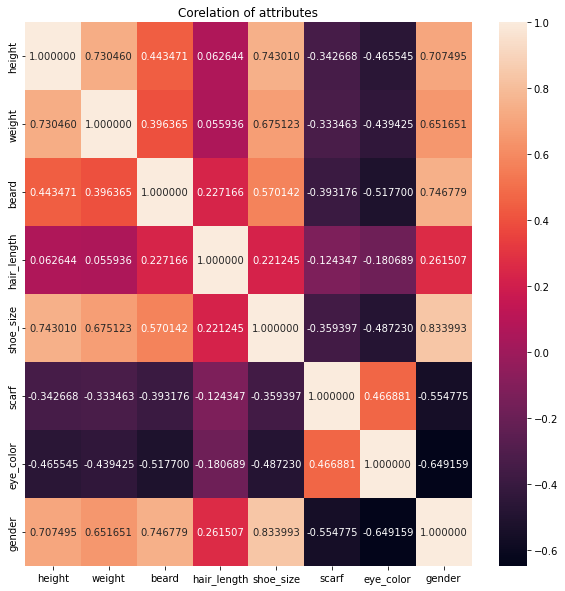

In [4]:
featuresForDf = list(zip(height, weight,beard_encoded,hairLength_encoded,shoe_size,eyeColor_encoded,scarf_encoded,gender_encoded))
df = pd.DataFrame (featuresForDf, columns = ['height',	'weight',	'beard','hair_length','shoe_size'	,'scarf','eye_color', 'gender'])
df.corr()
plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(),annot=True,fmt="f").set_title("Corelation of attributes")
plt.show()

In [60]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) # 67.666% training and 33.33% test
X_train, X_test, y_train, y_test = train_test_split(features, gender_encoded, test_size=0.20) # % training and 20% test
#X_train, X_test, y_train, y_test = train_test_split(features_exlude, gender_encoded, test_size=0.20) # % training and 20% test



In [61]:
#random forest
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Confusion matrix for Random Forest\n')
print(confusion_matrix(y_true = y_test, y_pred=y_pred ))
print('\n')
print(classification_report(y_test,y_pred ))
print("Accuracy of Random Forest:",accuracy_score(y_true = y_test, y_pred=y_pred,),'\n')




Confusion matrix for Random Forest

[[5 1]
 [3 7]]


              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.88      0.70      0.78        10

    accuracy                           0.75        16
   macro avg       0.75      0.77      0.75        16
weighted avg       0.78      0.75      0.75        16

Accuracy of Random Forest: 0.75 



In [62]:
#using SVM
classifier = svm.SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) 

print('Confusion matrix for SVM\n')
print(confusion_matrix(y_test,y_pred ))
print('\n')
print(classification_report(y_test,y_pred ))
print("Accuracy of SVM on Dataset is: ",accuracy_score(y_true = y_test, y_pred=y_pred,),'\n')

Confusion matrix for SVM

[[ 6  0]
 [ 0 10]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        10

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

Accuracy of SVM on Dataset is:  1.0 



In [63]:
classifier= MLPClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) 

print('Confusion matrix for MLP\n')
print(confusion_matrix(y_test,y_pred ))
print('\n')
print(classification_report(y_test,y_pred ))
print("Accuracy of MLP on Dataset is: ",accuracy_score(y_true = y_test, y_pred=y_pred,),'\n')

Confusion matrix for MLP

[[ 2  4]
 [ 0 10]]


              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.71      1.00      0.83        10

    accuracy                           0.75        16
   macro avg       0.86      0.67      0.67        16
weighted avg       0.82      0.75      0.71        16

Accuracy of MLP on Dataset is:  0.75 



In [95]:
#id3 IRIS
#Create a Gaussian Classifier
clf = DecisionTreeClassifier(random_state=10)

lpo = LeavePOut(p=2)

score = cross_val_score(clf, features, gender_encoded,scoring='f1', cv = lpo)
mean_score = cross_val_score(clf, features, gender_encoded, scoring='f1', cv = lpo).mean()
std_score = cross_val_score(clf, features, gender_encoded, scoring='f1' ,cv = lpo, error_score=1).std()


print("Average F1 Score: ", mean_score)
print("Standard Deviation F1 Score: ", std_score)


c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics

Average F1 Score:  0.7819620253164556
Standard Deviation F1 Score:  0.3975552274784928


c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics

In [ ]:
#id3 IRIS
#monto carlo validation using 5 
clf = DecisionTreeClassifier(random_state=10)

ss = ShuffleSplit(train_size=0.7, test_size=0.3, n_splits = 5)
score = cross_val_score(clf, features, gender_encoded, scoring='f1', cv = ss)
mean_score = cross_val_score(clf, features, gender_encoded, scoring='f1', cv = ss).mean()
std_score = cross_val_score(clf, features, gender_encoded, scoring='f1', cv = ss).std()

print("Cross Validation F1 Scores: ", score)
print("Average F1 Score: ", mean_score)
print("Standard Deviation F1 Score: ", std_score)



Cross Validation F1 Scores:  [0.91666667 0.95833333 0.95833333 0.91666667 0.875     ]
Average F1 Score:  0.9522564581388112
Standard Deviation F1 Score:  0.03342176973737819


In [ ]:
#NAIVE

 features.append ()
gaussian = GaussianNB()

gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test) 


print('Confusion matrix for Naive Bayes\n')
print(confusion_matrix(y_test,y_pred ))
print('\n')
print(classification_report(y_test,y_pred ))


print("Accuracy of Naive Bayes:",accuracy_score(y_true = y_test, y_pred=y_pred,),'\n')


Confusion matrix for Naive Bayes

[[94 22]
 [13 50]]


              precision    recall  f1-score   support

           0       0.88      0.81      0.84       116
           1       0.69      0.79      0.74        63

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.81      0.80      0.81       179

Accuracy of Naive Bayes: 0.8044692737430168 

